In [1]:
import shutil
import random
import math
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


2022-11-01 05:44:48.450957: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-01 05:44:48.569179: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-01 05:44:48.593115: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-01 05:44:49.086200: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

### Split data

In [8]:
import shutil
import random
import math
import os
import numpy as np

root_dir = './dataset/master_data/'
classes = ['fake', 'real']

for clss in classes:
    print('---------'+clss+'---------')
    dirtry = os.path.join(root_dir, clss)
    files = os.listdir(dirtry)
    np.random.shuffle(files)

    base_outdir = './dataset/split'

    for folder in ['train', 'val', 'test']:
        target_dir = os.path.join(base_outdir, folder)
        os.makedirs(os.path.join(target_dir, clss))
        target_class = os.path.join(target_dir, clss)

        if folder == 'train':
            images_to_pass = files[:math.floor(0.8*len(files))]
            for img in images_to_pass:
                img = os.path.join(dirtry, img)
                shutil.copy(img, target_class)
        elif folder == 'val':
            images_to_pass = files[math.floor(0.8*len(files)): math.floor(0.9*len(files))]
            for img in images_to_pass:
                img = os.path.join(dirtry, img)
                shutil.copy(img, target_class)
        else:
            images_to_pass = files[math.floor(0.9*len(files)):]
            for img in images_to_pass:
                img = os.path.join(dirtry, img)
                shutil.copy(img, target_class)

---------fake---------
---------real---------


### Check Data

In [2]:
val_sum = 0
for cat in os.listdir('./dataset/split/val'):
    lnk = os.path.join('./dataset/split/val', cat)
    val_sum += len(os.listdir(lnk))

train_sum = 0
for cat in os.listdir('./dataset/split/train'):
    lnk = os.path.join('./dataset/split/train', cat)
    train_sum += len(os.listdir(lnk))

test_sum = 0
for cat in os.listdir('./dataset/split/test'):
    lnk = os.path.join('./dataset/split/test', cat)
    test_sum += len(os.listdir(lnk))

print(train_sum)
print(val_sum)
print(test_sum)
print(val_sum+train_sum+test_sum)

len(os.listdir('./dataset/master_data/fake/') + os.listdir('./dataset/master_data/real/'))

8759
1095
1096
10950


10950

In [3]:
img_height, img_width = 512, 512
batch_size = 32
train_dir = "./dataset/split"

train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(train_dir, "train"),
    image_size = (img_height, imga_width),
    batch_size = batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(train_dir, "val"),
    image_size = (img_height, img_width),
    batch_size = batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(train_dir, "test"),
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 8759 files belonging to 2 classes.


2022-11-01 05:44:56.544603: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-01 05:44:58.239155: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22290 MB memory:  -> device: 0, name: GeForce RTX 3090, pci bus id: 0000:19:00.0, compute capability: 8.6
2022-11-01 05:44:58.240342: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22290 MB memory:  -> device: 1, name: GeForce RTX 3090, pci bus id: 0000:1a:00.0, compute capability: 8.6
2022-11-01 05:44:58.241386: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/t

Found 1095 files belonging to 2 classes.
Found 1096 files belonging to 2 classes.


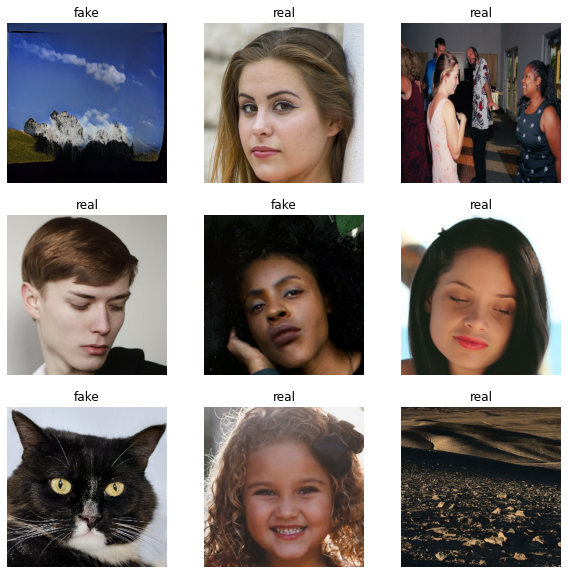

In [4]:
class_names = ["fake", "real"]
plt.figure(figsize=(10,10))

# get a batch of batch_size
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8")) # displaying image
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Training

In [35]:
irv2 = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    input_shape=(img_height, img_width, 3), 
    pooling='avg',
    classes=2,
    weights='imagenet'
)

for layer in irv2.layers[:-4]:
    layer.trainable = False

In [5]:
mnv2 = tf.keras.applications.MobileNetV3Large(
    include_top=False,
    input_shape=(img_height, img_width, 3), 
    pooling='avg',
    classes=2,
    weights='imagenet'
)

# for layer in mnv2.layers[:-10]:
#     layer.trainable = False

In [6]:
rn50v2 = tf.keras.applications.ResNet50V2(
    include_top=False,
    input_shape=(img_height, img_width, 3), 
    pooling='avg',
    classes=2,
    weights='imagenet'
)

for layer in rn50v2.layers:
    layer.trainable = False

In [6]:
enb3 = tf.keras.applications.EfficientNetB3(
    include_top=False,
    input_shape=(img_height, img_width, 3), 
    pooling='avg',
    classes=2,
    weights='imagenet'
)

for layer in enb3.layers:
    layer.trainable = False

In [7]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),
        # irv2,
        # mnv2,
        # rn50v2,
        enb3,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ]
)

In [8]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [9]:
EPOCHS = 20

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs = EPOCHS
)

Epoch 1/20


2022-11-01 05:46:09.006259: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500


  1/274 [..............................] - ETA: 36:08 - loss: 0.6932 - accuracy: 0.5312

2022-11-01 05:46:09.384454: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2022-11-01 05:46:09.386097: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.6
2022-11-01 05:46:09.386112: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2022-11-01 05:46:09.386179: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-11-01 05:46:09.394908: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] Tensor

 58/274 [=====>........................] - ETA: 38s - loss: 0.7206 - accuracy: 0.5447

2022-11-01 05:46:19.573784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/274 [=========>....................] - ETA: 31s - loss: 0.7075 - accuracy: 0.5574

2022-11-01 05:46:26.944544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - ETA: 0s - loss: 0.6945 - accuracy: 0.5634

2022-11-01 05:47:02.263154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - 65s 208ms/step - loss: 0.6945 - accuracy: 0.5634 - val_loss: 0.6657 - val_accuracy: 0.5799
Epoch 2/20
 58/274 [=====>........................] - ETA: 38s - loss: 0.6843 - accuracy: 0.5652

2022-11-01 05:47:16.885973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/274 [=========>....................] - ETA: 31s - loss: 0.6838 - accuracy: 0.5676

2022-11-01 05:47:24.299328: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - ETA: 0s - loss: 0.6782 - accuracy: 0.5789

2022-11-01 05:47:58.249640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - 56s 203ms/step - loss: 0.6782 - accuracy: 0.5789 - val_loss: 0.6673 - val_accuracy: 0.5799
Epoch 3/20
 58/274 [=====>........................] - ETA: 38s - loss: 0.6761 - accuracy: 0.5657

2022-11-01 05:48:12.883146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/274 [=========>....................] - ETA: 31s - loss: 0.6742 - accuracy: 0.5707

2022-11-01 05:48:20.297452: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - ETA: 0s - loss: 0.6723 - accuracy: 0.5788

2022-11-01 05:48:54.291079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - 56s 203ms/step - loss: 0.6723 - accuracy: 0.5788 - val_loss: 0.6698 - val_accuracy: 0.6018
Epoch 4/20
 58/274 [=====>........................] - ETA: 39s - loss: 0.6766 - accuracy: 0.5760

2022-11-01 05:49:08.952822: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/274 [=========>....................] - ETA: 31s - loss: 0.6744 - accuracy: 0.5789

2022-11-01 05:49:16.358610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - ETA: 0s - loss: 0.6726 - accuracy: 0.5852

2022-11-01 05:49:50.345075: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - 56s 203ms/step - loss: 0.6726 - accuracy: 0.5852 - val_loss: 0.6658 - val_accuracy: 0.6055
Epoch 5/20
 58/274 [=====>........................] - ETA: 38s - loss: 0.6715 - accuracy: 0.5830

2022-11-01 05:50:04.924980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/274 [=========>....................] - ETA: 31s - loss: 0.6708 - accuracy: 0.5830

2022-11-01 05:50:12.340350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - ETA: 0s - loss: 0.6682 - accuracy: 0.5914

2022-11-01 05:50:46.317982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - 56s 203ms/step - loss: 0.6682 - accuracy: 0.5914 - val_loss: 0.6656 - val_accuracy: 0.5918
Epoch 6/20
 58/274 [=====>........................] - ETA: 39s - loss: 0.6709 - accuracy: 0.5905

2022-11-01 05:51:00.958830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/274 [=========>....................] - ETA: 31s - loss: 0.6710 - accuracy: 0.5900

2022-11-01 05:51:08.377977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - ETA: 0s - loss: 0.6709 - accuracy: 0.5840

2022-11-01 05:51:42.354107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - 56s 203ms/step - loss: 0.6709 - accuracy: 0.5840 - val_loss: 0.6650 - val_accuracy: 0.5799
Epoch 7/20
 58/274 [=====>........................] - ETA: 39s - loss: 0.6739 - accuracy: 0.5803

2022-11-01 05:51:57.011998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/274 [=========>....................] - ETA: 31s - loss: 0.6721 - accuracy: 0.5874

2022-11-01 05:52:04.449208: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - ETA: 0s - loss: 0.6700 - accuracy: 0.5897

2022-11-01 05:52:38.442376: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - 56s 204ms/step - loss: 0.6700 - accuracy: 0.5897 - val_loss: 0.6652 - val_accuracy: 0.6575
Epoch 8/20
 58/274 [=====>........................] - ETA: 39s - loss: 0.6773 - accuracy: 0.5878

2022-11-01 05:52:53.105348: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/274 [=========>....................] - ETA: 31s - loss: 0.6740 - accuracy: 0.5830

2022-11-01 05:53:00.545315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - ETA: 0s - loss: 0.6706 - accuracy: 0.5915

2022-11-01 05:53:34.553186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - 56s 204ms/step - loss: 0.6706 - accuracy: 0.5915 - val_loss: 0.6641 - val_accuracy: 0.5799
Epoch 9/20
 58/274 [=====>........................] - ETA: 39s - loss: 0.6786 - accuracy: 0.5781

2022-11-01 05:53:49.200319: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/274 [=========>....................] - ETA: 31s - loss: 0.6774 - accuracy: 0.5805

2022-11-01 05:53:56.463177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - ETA: 0s - loss: 0.6725 - accuracy: 0.5841

2022-11-01 05:54:30.473043: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - 56s 203ms/step - loss: 0.6725 - accuracy: 0.5841 - val_loss: 0.6653 - val_accuracy: 0.5799
Epoch 10/20
 58/274 [=====>........................] - ETA: 39s - loss: 0.6760 - accuracy: 0.5733

2022-11-01 05:54:45.163738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/274 [=========>....................] - ETA: 31s - loss: 0.6755 - accuracy: 0.5761

2022-11-01 05:54:52.582455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - ETA: 0s - loss: 0.6706 - accuracy: 0.5841

2022-11-01 05:55:26.566943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - 56s 203ms/step - loss: 0.6706 - accuracy: 0.5841 - val_loss: 0.6650 - val_accuracy: 0.5799
Epoch 11/20
 58/274 [=====>........................] - ETA: 39s - loss: 0.6759 - accuracy: 0.5630

2022-11-01 05:55:41.223081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/274 [=========>....................] - ETA: 31s - loss: 0.6733 - accuracy: 0.5679

2022-11-01 05:55:48.637201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - ETA: 0s - loss: 0.6703 - accuracy: 0.5828

2022-11-01 05:56:22.685990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - 56s 204ms/step - loss: 0.6703 - accuracy: 0.5828 - val_loss: 0.6639 - val_accuracy: 0.5872
Epoch 12/20
 58/274 [=====>........................] - ETA: 38s - loss: 0.6797 - accuracy: 0.5571

2022-11-01 05:56:37.311422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/274 [=========>....................] - ETA: 31s - loss: 0.6775 - accuracy: 0.5559

2022-11-01 05:56:44.724481: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - ETA: 0s - loss: 0.6726 - accuracy: 0.5756

2022-11-01 05:57:18.778137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - 56s 203ms/step - loss: 0.6726 - accuracy: 0.5756 - val_loss: 0.6656 - val_accuracy: 0.6493
Epoch 13/20
 58/274 [=====>........................] - ETA: 39s - loss: 0.6735 - accuracy: 0.5905

2022-11-01 05:57:33.433022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/274 [=========>....................] - ETA: 31s - loss: 0.6735 - accuracy: 0.5865

2022-11-01 05:57:40.829417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - ETA: 0s - loss: 0.6709 - accuracy: 0.5857

2022-11-01 05:58:14.795280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - 56s 203ms/step - loss: 0.6709 - accuracy: 0.5857 - val_loss: 0.6636 - val_accuracy: 0.5799
Epoch 14/20
 58/274 [=====>........................] - ETA: 39s - loss: 0.6751 - accuracy: 0.5770

2022-11-01 05:58:29.409579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/274 [=========>....................] - ETA: 31s - loss: 0.6722 - accuracy: 0.5802

2022-11-01 05:58:36.853172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - ETA: 0s - loss: 0.6703 - accuracy: 0.5887

2022-11-01 05:59:10.842115: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - 56s 203ms/step - loss: 0.6703 - accuracy: 0.5887 - val_loss: 0.6629 - val_accuracy: 0.5799
Epoch 15/20
 58/274 [=====>........................] - ETA: 39s - loss: 0.6725 - accuracy: 0.5884

2022-11-01 05:59:25.487615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/274 [=========>....................] - ETA: 31s - loss: 0.6713 - accuracy: 0.5903

2022-11-01 05:59:32.902029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - ETA: 0s - loss: 0.6697 - accuracy: 0.5925

2022-11-01 06:00:06.890842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - 56s 203ms/step - loss: 0.6697 - accuracy: 0.5925 - val_loss: 0.6648 - val_accuracy: 0.6493
Epoch 16/20
 58/274 [=====>........................] - ETA: 39s - loss: 0.6713 - accuracy: 0.5770

2022-11-01 06:00:21.554606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/274 [=========>....................] - ETA: 31s - loss: 0.6692 - accuracy: 0.5811

2022-11-01 06:00:28.987423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - ETA: 0s - loss: 0.6695 - accuracy: 0.5897

2022-11-01 06:01:03.032657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - 56s 204ms/step - loss: 0.6695 - accuracy: 0.5897 - val_loss: 0.6644 - val_accuracy: 0.5799
Epoch 17/20
 58/274 [=====>........................] - ETA: 38s - loss: 0.6685 - accuracy: 0.5948

2022-11-01 06:01:17.660578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/274 [=========>....................] - ETA: 31s - loss: 0.6717 - accuracy: 0.5931

2022-11-01 06:01:25.086669: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - ETA: 0s - loss: 0.6705 - accuracy: 0.5901

2022-11-01 06:01:59.044345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - 56s 203ms/step - loss: 0.6705 - accuracy: 0.5901 - val_loss: 0.6638 - val_accuracy: 0.5845
Epoch 18/20
 58/274 [=====>........................] - ETA: 38s - loss: 0.6695 - accuracy: 0.5911

2022-11-01 06:02:13.675941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/274 [=========>....................] - ETA: 31s - loss: 0.6717 - accuracy: 0.5884

2022-11-01 06:02:21.108848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - ETA: 0s - loss: 0.6697 - accuracy: 0.5893

2022-11-01 06:02:55.100511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - 56s 203ms/step - loss: 0.6697 - accuracy: 0.5893 - val_loss: 0.6631 - val_accuracy: 0.5872
Epoch 19/20
 58/274 [=====>........................] - ETA: 39s - loss: 0.6712 - accuracy: 0.5814

2022-11-01 06:03:09.797307: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/274 [=========>....................] - ETA: 31s - loss: 0.6713 - accuracy: 0.5846

2022-11-01 06:03:17.200475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - ETA: 0s - loss: 0.6704 - accuracy: 0.5910

2022-11-01 06:03:51.134991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - 56s 203ms/step - loss: 0.6704 - accuracy: 0.5910 - val_loss: 0.6632 - val_accuracy: 0.6192
Epoch 20/20
 58/274 [=====>........................] - ETA: 38s - loss: 0.6688 - accuracy: 0.5894

2022-11-01 06:04:05.660201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 99/274 [=========>....................] - ETA: 31s - loss: 0.6704 - accuracy: 0.5843

2022-11-01 06:04:13.054420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - ETA: 0s - loss: 0.6686 - accuracy: 0.5914

2022-11-01 06:04:47.079595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


274/274 [==============================] - 56s 203ms/step - loss: 0.6686 - accuracy: 0.5914 - val_loss: 0.6626 - val_accuracy: 0.5799


### Model Evaluation

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 512, 512, 3)       0         
                                                                 
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24,614,914
Trainable params: 1,050,114
Non-trainable params: 23,564,800
_________________________________________________________________


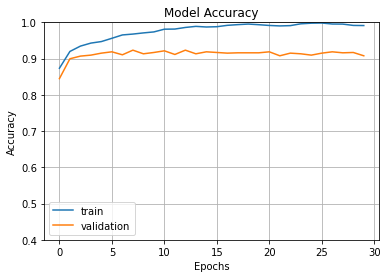

In [11]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [12]:
model.evaluate(test_ds)

35/35 [==============================] - 4s 115ms/step - loss: 0.4904 - accuracy: 0.9024


[0.49037477374076843, 0.9023722410202026]

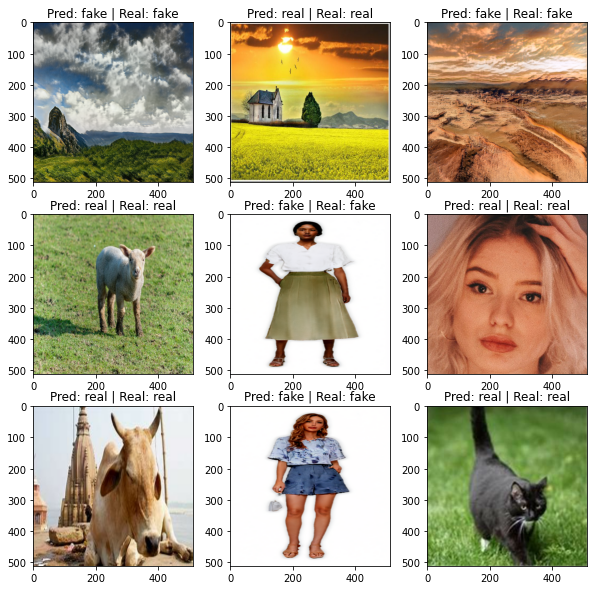

In [13]:
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
    classifications = model(images)
    # print(classifications)

    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        index = np.argmax(classifications[i])
        plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

### Saving and Exporting

In [14]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
NAME = "rn50v2_baseline_30.tflite"

with open(os.path.join("./tflite", NAME), "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpxnd1l5c2/assets


INFO:tensorflow:Assets written to: /tmp/tmpxnd1l5c2/assets
2022-11-01 05:35:38.632594: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-11-01 05:35:38.632626: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-11-01 05:35:38.633211: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpxnd1l5c2
2022-11-01 05:35:38.655480: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-11-01 05:35:38.655503: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpxnd1l5c2
2022-11-01 05:35:38.729730: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-11-01 05:35:38.755945: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-11-01 05:35:39.165993: I tensorflow/cc/saved_model/loader.cc:213] Running initializatio

In [15]:
# SavedModel format
MODEL_NAME = "rn50v2_baseline_30"

model.save(f"./SavedModel/{MODEL_NAME}/model")

INFO:tensorflow:Assets written to: ./SavedModel/rn50v2_baseline_30/model/assets


INFO:tensorflow:Assets written to: ./SavedModel/rn50v2_baseline_30/model/assets


### Test Model (UNUSED)

In [22]:
test_model = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(512, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(512, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(512, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(2)
    ]
)

test_model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [12]:
EPOCHS = 10

test_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs = EPOCHS
)

### Zip

In [ ]:
import shutil
shutil.make_archive('dataset/split')